#  Analyze EGFD Accountability Data 

E.Quinn  7/28/2018

In [1]:
import re
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import struct
from datetime import datetime
import datetime

In [2]:
pd.set_option('display.max_rows', 3000)

In [3]:
start_date = datetime.datetime(2017,1,1,6,0,0)
end_date   = datetime.datetime(2018,5,17,1,0,0)

## Dictionary for looking up platoon by name

In [4]:
FF_platoon = {'FF Andrade': 'C','FF Archambault': 'A','Lt Babcock': 'D','Lt Bailey': 'A','Lt Beaudreau': 'B','FF Campbell': 'A', \
         'FF Columbier': 'B','Prob-FF Crute': 'B','FF DeLuca': 'A','FF Forte': 'C','Lt Gardner': 'B','Prob-FF Gorman': 'D', \
         'Lt Grady': 'B','Lt Greene': 'B','Lt Hall': 'D','FF Howard': 'B','Lt Jones': 'C','FF King': 'C','FF Lang Jr.': 'D', \
         'Prob-FF Lavallee': 'D','FF Marsh': 'D','Lt Matola, Jr.': 'D','FF McKeon': 'C','Capt Mears': 'C','Lt Monaghan': 'A', \
         'Capt Montville': 'A',"FF O'Donnell": 'A','Prob-FF Perry': 'B','Lt Perry': 'B','Prob-FF Preston': 'A',  \
         'Lt Purcell': 'C','Lt Richardson': 'A','FF Snowling': 'B','FF Stabile': 'D','FF Szerlag': 'C','Lt Warner III': 'D'}                 


## Dictionary for looking up identifier by name

In [5]:
FF_token = {'FF Andrade': 'CFF2','FF Archambault': 'AFF1','Lt Babcock': 'DOF2','Lt Bailey': 'AOF2', \
        'Lt Beaudreau': 'BOF3','FF Campbell': 'AFF4', \
        'FF Columbier': 'BFF1','Prob-FF Crute': 'BFF4','FF DeLuca': 'AFF5','FF Forte': 'CFF4', \
        'Lt Gardner': 'BOF2','Prob-FF Gorman': 'DFF5', \
        'Lt Grady': 'BOF4','Lt Greene': 'COF4','Lt Hall': 'DOF1','FF Howard': 'BFF3','Lt Jones': 'COF2', \
        'FF King': 'CFF1','FF Lang Jr.': 'DFF3', \
        'Prob-FF Lavallee': 'DFF4','FF Marsh': 'DFF1','Lt Matola, Jr.': 'DOF4','FF McKeon': 'CFF5', \
        'Capt Mears': 'COF1','Lt Monaghan': 'AOF4', \
        'Capt Montville': 'AOF3',"FF O'Donnell": 'AFF2','Prob-FF Perry': 'BFF5','Lt Perry': 'BOF1', \
        'Prob-FF Preston': 'AFF3', 'Lt Purcell': 'COF3','Lt Richardson': 'AOF1','FF Snowling': 'BFF2', \
        'FF Stabile': 'DFF2','FF Szerlag': 'CFF3','Lt Warner III': 'DOF3','FF Squillante':'EFF1'}                 


## Dictionary for looking up name by identifier

In [6]:
token_FF = {'CFF2':'FF Andrade','AFF1':'FF Archambault','DOF2':'Lt Babcock','AOF2':'Lt Bailey', \
        'BOF3':'Lt Beaudreau','AFF4':'FF Campbell', \
        'BFF1':'FF Columbier','BFF4':'Prob-FF Crute','AFF5':'FF DeLuca','CFF4':'FF Forte', \
        'BOF2':'Lt Gardner','DFF5':'Prob-FF Gorman', \
        'BOF4':'Lt Grady','COF4':'Lt Greene','DOF1':'Lt Hall','BFF3':'FF Howard','COF2':'Lt Jones', \
        'CFF1':'FF King','DFF3':'FF Lang Jr.', \
        'DFF4':'Prob-FF Lavallee','DFF1':'FF Marsh','DOF4':'Lt Matola, Jr.','CFF5':'FF McKeon', \
        'COF1':'Capt Mears','AOF4':'Lt Monaghan', \
        'AOF3':'Capt Montville','AFF2':"FF O'Donnell",'BFF5':'Prob-FF Perry','BOF1':'Lt Perry', \
        'AFF3':'Prob-FF Preston', 'COF3':'Lt Purcell','AOF1':'Lt Richardson','BFF2':'FF Snowling', \
        'DFF2':'FF Stabile','CFF3':'FF Szerlag','DOF3':'Lt Warner III','EFF1':'FF Squillante'}                 


## Dictionary of 8-day cycle start times by platoon

Get cycle start times that fall between start_date and end_date

In [7]:
def get_cycles(startdt,enddt,maxdt,base_date):
    
    cycles = {}

    for platoon in base_date.keys():                      # loop through earliest cycle start for each platoon
        cycles[platoon] = {}                         # create dictionary for platoon
        ss = base_date[platoon]                           # start with earliest cycle start time
        while (ss < maxdt):                         # loop until cycle start is past max_datetime
            if ((ss > startdt) & (ss < enddt)):
                cycles[platoon][ss] = {}                 # add dictionary for cycle start
            ss += datetime.timedelta(days=8)               # increment cycle start by 8 days
            
    return(cycles)

In [8]:
def get_cycles(startdt,enddt,maxdt,base_date):
    
    cycles = {}

    for platoon in base_date.keys():                      # loop through earliest cycle start for each platoon
        cycles[platoon] = {}                         # create dictionary for platoon
        ss = base_date[platoon]                           # start with earliest cycle start time
        while (ss < maxdt):                         # loop until cycle start is past max_datetime
            if ((ss > startdt) & (ss < enddt)):
                cycles[platoon][ss] = {}                 # add dictionary for cycle start
            ss += datetime.timedelta(days=8)               # increment cycle start by 8 days
            
    return(cycles)

In [11]:
base_date = {}
base_date['A'] = datetime.datetime(2016,12,26,7,0,0)   #first cycle start 1/1/2017 07:00 or earlier for this platoon
base_date['B'] = datetime.datetime(2016,12,28,7,0,0)
base_date['C'] = datetime.datetime(2016,12,30,7,0,0)
base_date['D'] = datetime.datetime(2017,1,1,7,0,0)

cycle_start = {}                                       # dictionary for cycle start by platoon

max_datetime = datetime.datetime(2018,7,1,0,0,0)

cycle_start = get_cycles(start_date,end_date,max_datetime,base_date)

print('Number of 8-Day Cycles')
print('A ' + str(len(cycle_start['A'])))
print('B ' + str(len(cycle_start['B'])))
print('C ' + str(len(cycle_start['C'])))
print('D ' + str(len(cycle_start['D'])))

Number of 8-Day Cycles
A 63
B 63
C 62
D 63


## Function determines whether shift is scheduled or vacant

In [78]:
def shift_type(token,ts):
    stype = 'scheduled'
    if (token == 'AFF3'):
        if ((ts.year == 2017) & (ts.month < 6)) : stype = 'vacant'
        if ((ts.year == 2017) & (ts.month == 6) & (ts.day<26)) : stype = 'vacant'
    if (token == 'BFF4'):
        if ((ts.year == 2017) & (ts.month < 6)) : stype = 'vacant'
        if ((ts.year == 2017) & (ts.month == 6) & (ts.day<26)) : stype = 'vacant'
    return(stype)

## Build list of shifts for each FF

In [79]:
shifts = {}       

for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon+ ffn
        shifts[token] = {}
        shifts[token]['name'] = token_FF[token]
        shifts[token]['platoon'] = platoon
        shifts[token]['shifts'] = {}
        for cycle in cycle_start[platoon]:
            shift = cycle
            shifts[token]['shifts'][shift] = {'type':shift_type(token,shift)}
            shift += datetime.timedelta(days=1)   # increment cycle start by 10 hours + 1 day
            shifts[token]['shifts'][shift] = {'type':shift_type(token,shift)}
            shift += datetime.timedelta(days=1)
            shift += datetime.timedelta(hours=10)   # increment cycle start by 10 hours + 1 day
            shifts[token]['shifts'][shift] = {'type':shift_type(token,shift)}
            shift += datetime.timedelta(days=1)   # increment cycle start by 1 day
            shifts[token]['shifts'][shift] = {'type':shift_type(token,shift)}
        

## Lookup dictionary to get accountability file names by FF

These are the .csv files extracted from Eric's spreadsheet of accountability data

In [80]:
logs = {'FF Andrade': 'FF_Andrade.csv', \
                       'FF Archambault': 'FF_Archambault.csv', \
                       'Lt Babcock': 'Lt_Babcock.csv', \
                       'Lt Bailey': 'Lt_Bailey.csv', \
                       'Lt Beaudreau': 'Lt_Beaudreau.csv', \
                       'FF Campbell': 'FF_Campbell.csv', \
                       'FF Columbier': 'FF_Columbier.csv', \
                       'Prob-FF Crute': 'Prob-FF_Crute.csv', \
                       'FF DeLuca': 'FF_DeLuca.csv', \
                       'FF Forte': 'FF_Forte.csv', \
                       'Lt Gardner': 'Lt_Gardner.csv', \
                       'Prob-FF Gorman': 'Prob-FF_Gorman.csv', \
                       'Lt Grady': 'Lt_Grady.csv', \
                       'Lt Greene': 'Lt_Greene.csv', \
                       'Lt Hall': 'FF_Hall.csv', \
                       'FF Howard': 'FF_Howard.csv', \
                       'Lt Jones': 'Lt_Jones.csv', \
                       'FF King': 'FF_King.csv',
                       'FF Lang Jr.': 'FF_Lang.csv', \
                       'Prob-FF Lavallee': 'Prob-FF_Lavallee.csv', \
                       'FF Marsh': 'FF_Marsh.csv', \
                       'Lt Matola, Jr.': 'Lt_Matola.csv', \
                       'FF McKeon': 'FF_McKeon.csv', \
                       'Capt Mears': 'Capt_Mears.csv', \
                       'Lt Monaghan': 'Lt_Monaghan.csv', \
                       'Capt Montville': 'Capt_Montville.csv', \
                       "FF O'Donnell": 'FF_ODonnell.csv', \
                       'Prob-FF Perry': 'Prob-FF_Perry.csv', \
                       'Lt Perry': 'Lt_Perry.csv', \
                       'Prob-FF Preston': 'Prob-FF_Preston.csv',  \
                       'Lt Purcell': 'Lt_Purcell.csv', \
                       'Lt Richardson': 'Lt_Richardson.csv', \
                       'FF Snowling': 'FF_Snowling.csv', \
                       'FF Stabile': 'FF_Stabile.csv', \
                       'FF Szerlag': 'FF_Szerlag.csv', \
                       'Lt Warner III': 'Lt_Warner.csv'}                 

## Read the accountability logs and add the data to the dictionaries

There is one .csv file containing the accountability data for each firefighter

Data elements are added to the dictionary for that firefighter and shift

In [81]:
def findOccurrences(s, ch):
    return [i for i, letter in enumerate(s) if letter == ch]

In [82]:
def clean_reason(reason,for_ff):
    new_reason = ''
    if (for_ff == ''):
        new_reason += reason
    else:
        if ((',' in reason) & ('-' in reason)):
            ix = findOccurrences(reason,'-')
            ix_last = ix[len(ix)-1]
            new_reason += FF_token[for_ff] + reason[ix_last:]

    return(new_reason)        

In [83]:
def read_acct(token):
    
    ff_name = token_FF[token]
    fname = '../' + logs[ff_name]                                   #get the filename for this FF
    acctdf = pd.read_csv(fname,parse_dates=[[0,1]],skiprows=2,header=None)   #read it
    acctdf.rename(columns={'0_1': 'shift',2:'type',3:'hours',4:'rank',5:'reason'},inplace=True)
    acctdf['FF_name'] = ff_name       #create a column for this FFs name
    
    for index, row in acctdf.iterrows():    #loop through row by row and add data to dictionary
        ff_name = row['FF_name']             #shifts dictionary key is FF name
        shift = row['shift'].to_pydatetime()
        dtv = datetime.datetime(shift.year,shift.month,shift.day,shift.hour,0,0)
        if dtv not in shifts[token]['shifts']:
            shifts[token]['shifts'][dtv] = {}
        
        try:                                      #create dictionary for accountability data
            sdict = shifts[token]['shifts'][dtv]['acct']
        except KeyError:                          #if this shift was not found add it
            shifts[token]['shifts'][dtv]['acct'] = {}
            sdict = shifts[token]['shifts'][dtv]['acct']
                                                  #fill in the accountability data elements
        typ = row['type']
        sdict['type'] = row['type']
        sdict['hours'] = float(row['hours'])
        sdict['rank'] = row['rank']
        sdict['reason'] = row['reason']
        rstr = row['reason']                      #determine whose shift was being covered
        for_ff = ''                               #search for specific name in reason string
        if isinstance(rstr, str):
            if ('Andrade' in rstr):  for_ff = 'FF Andrade'
            if ('Archambault' in rstr):  for_ff = 'FF Archambault'
            if ('Babcock' in rstr):  for_ff = 'Lt Babcock'
            if ('Bailey' in rstr): for_ff = 'Lt Bailey'
            if ('Beaudreau' in rstr): for_ff = 'Lt Beaudreau'
            if ('Campbell' in rstr): for_ff = 'FF Campbell'
            if ('Columbier' in rstr): for_ff = 'FF Columbier'
            if ('Crute' in rstr): for_ff = 'Prob-FF Crute'
            if ('DeLuca' in rstr): for_ff = 'FF DeLuca'
            if ('Forte' in rstr): for_ff = 'FF Forte'
            if ('Gardner' in rstr): for_ff = 'Lt Gardner'
            if ('Gorman' in rstr): for_ff = 'Prob-FF Gorman'
            if ('Grady' in rstr): for_ff = 'Lt Grady'
            if ('Greene' in rstr): for_ff = 'Lt Greene'
            if ('Hall' in rstr): for_ff = 'Lt Hall'
            if ('Howard' in rstr): for_ff = 'FF Howard'
            if ('Jones' in rstr): for_ff = 'Lt Jones'
            if ('King' in rstr): for_ff = 'FF King'
            if ('Lang' in rstr): for_ff = 'FF Lang Jr.'
            if ('Lavallee' in rstr): for_ff = 'Prob-FF Lavallee'
            if ('Marsh' in rstr): for_ff = 'FF Marsh'
            if ('Matola' in rstr): for_ff = 'Lt Matola, Jr.'
            if ('McKeon' in rstr): for_ff = 'FF McKeon'
            if ('Mears' in rstr): for_ff = 'Capt Mears'
            if ('Monaghan' in rstr): for_ff = 'Lt Monaghan'
            if ('Montville' in rstr): for_ff = 'Capt Montville'
            if ('Donnell' in rstr): for_ff = "FF O'Donnell"
            if ('FF Perry' in rstr): for_ff = 'Prob-FF Perry'
            if ('Lt Perry' in rstr): for_ff = 'Lt Perry'
            if ('Preston' in rstr): for_ff = 'Prob-FF Preston'
            if ('Purcell' in rstr): for_ff = 'Lt Purcell'
            if ('Richardson' in rstr): for_ff = 'Lt Richardson'
            if ('Snowling' in rstr): for_ff = 'FF Snowling'
            if ('Squillante' in rstr): for_ff = 'FF Squillante'
            if ('Stabile' in rstr): for_ff = 'FF Stabile'
            if ('Szerlag' in rstr): for_ff = 'FF Szerlag'
            if ('Warner' in rstr): for_ff = 'Lt Warner III'
            if (len(for_ff) > 0):
                shifts[token]['shifts'][dtv]['acct']['for_token'] = FF_token[for_ff]    #save FF being covered
            else:
                shifts[token]['shifts'][dtv]['acct']['for_token'] = ''  #no for_ff
            shifts[token]['shifts'][dtv]['acct']['clean_reason'] = clean_reason(rstr,for_ff)
    return()

In [84]:
for token in shifts.keys():
    read_acct(token)

## Write web page displaying results

## Set cell background color

In [85]:
def cellcolor(token,ts,shifts):
    bgcolor = '#FFFFFF'
    try:
        typ = shifts[token]['shifts'][ts]['acct']['type']
        if (typ == 'VC'): bgcolor = '#C0C0C0'
        if (typ == 'SL'): bgcolor = '#FF0000'
        if (typ == 'IOD'): bgcolor = '#FF00FF'
        if (typ in ['PRS','BER']): bgcolor = '#FFFF00'
        if ('CS-' in typ): bgcolor = '#00FF00'
        if ('C-' in typ): bgcolor = '#00FF00'
    except KeyError:
        x=1
    return(bgcolor)

In [119]:
shifts['BFF4']

{'name': 'Prob-FF Crute',
 'platoon': 'B',
 'shifts': {datetime.datetime(2017, 1, 5, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 6, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 7, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 8, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 13, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 14, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 15, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 16, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 21, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 22, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 23, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 24, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 29, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 30, 7, 0): {'type': 'vacant'},
  datetime.datetime(2017, 1, 31, 17, 0): {'type': 'vacant'},
  datetime.datetime(2017, 2, 1, 17, 0): {'ty

## Build type tag as a link into accountability data

In [148]:
def line2(token,ts,shifts):
    l2str = '<br>'
    try:
        typ = shifts[token]['shifts'][ts]['acct']['type']
        tag = token + str(ts)
        if (typ in ['VC','IOD','SWAP','SWAPW','SL','PRS','BER','CMP-U']): 
            l2str += '<a href="#' + tag + '">' + typ + '</a>'
        if ('OT-' in typ): l2str += '<a href="#' + tag + '">' + typ + '</a>'
        if (('C-' in typ) | ('CS-' in typ)): l2str += '<a href="#' + tag + '">' + typ + '</a>'
    except KeyError:
        try:
            styp = shifts[token]['shifts'][ts]['type']
            if (styp == 'vacant'):
                for token2 in shifts.keys():
                    if (token2 != token):
                        try:
                            typ = shifts[token2]['shifts'][ts]['acct']['type']
                            tag = token2 + str(ts)
                            if (typ == 'OT-VNCY'): l2str += '<a href="#' + tag + '">' + typ + '</a>'
                        except KeyError:
                            ;
        except KeyError:
            ;
    return(l2str)

## Build line 3: FF being covered, or FF covering

In [175]:
def line3(token,ts,shifts):
    l3str = '<br>'
    
    try:
        if (shifts[token]['shifts'][ts]['acct']['for_token'] != ''):
            token2 = shifts[token]['shifts'][ts]['acct']['for_token']
            tag = token2 + str(ts)
            l3str += '<a href="#' + tag + '">' + token2 + '</a>'
        else:
            for token2 in shifts.keys():
                try:
                    if (shifts[token2]['shifts'][ts]['acct']['for_token'] == token):
                        tag = token2 + str(ts)
                        l3str += '<a href="#' + tag + '">' + token2 + '</a>'
                except KeyError:
                    ;

    except KeyError:
        try:
            styp = shifts[token]['shifts'][ts]['type']
            if (styp == 'vacant'):
                for token2 in shifts.keys():
                    if (token2 != token):
                        try:
                            typ = shifts[token2]['shifts'][ts]['acct']['type']
                            tag = token2 + str(ts)
                            if (typ == 'OT-VNCY'): l3str += '<a href="#' + tag + '">' + token2 + '</a>'
                        except KeyError:
                            ;
        except KeyError:
            ;
    return(l3str)

## Build a row of cells representing a shift

In [176]:
def shiftabl(token,year,month,hour,shifts,file):        
    ndays = {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}
    if (hour == 7): 
        full_shift=10
        rowstr = '<tr align="center"><td rowspan="2">' + str(month) + '/' + str(year) + '</td>'
        rowstr +='<td>07:00</td>'
    else: 
        full_shift=14
        rowstr = '<tr><td>17:00</td>'
    
    for d in range(1,1+ndays[month]):
        ts = datetime.datetime(year,month,d,hour,0,0)
        tag = token + str(ts)
        
        rowstr += '<td bgcolor="' + cellcolor(token,ts,shifts) + '">'
        
                                                        #see if we are scheduled this shift
        try:
            if (shifts[token]['shifts'][ts]['type']=='scheduled'):   #see if there is an entry for this timestamp
                rowstr += 'On'
            if (shifts[token]['shifts'][ts]['type']=='vacant'):   #see if there is an entry for this timestamp
                rowstr += 'VNCY'
        except KeyError:
            rowstr += '&nbsp;'
        rowstr += line2(token,ts,shifts)
        rowstr += line3(token,ts,shifts)
        rowstr += '</td>'
    file.write(rowstr + '</tr>\n')
    return()

## Function returns the scheduled shifts given the cycle start 

In [177]:
def scheduled_this_cycle(cs):            #returns the four shifts scheduled in this cycle
    
    ts_list = []
    ts = cs
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts += datetime.timedelta(hours=10)   # increment cycle start by 10 hours + 1 day
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts_list.append(ts)
    return(ts_list)

## Function returns the 16 shifts in an 8-day cycle given the cycle start

In [178]:
def this_cycle(cs):            #returns the 16 shifts scheduled in this 8-day cycle
    
    cy_list = []
    ts = cs
    for hrs in [0,10,14,10,14,10,14,10,14,10,14,10,14,10,14,10]:
        ts += datetime.timedelta(hours=hrs)
        cy_list.append(ts)
    print(cy_list)
    return(cy_list)

## Function builds a dictionary of the regular hours for this FF and shift

In [179]:
def shift_hours(token,ts,shifts):            #returns a dictionary with all hours for this cycle
    
    sh = {}
    
    try:
        this_ff = shifts[token]['shifts'][ts]   #see if they have a record for this shift
        if ('acct' in this_ff.keys()):
            typ = this_ff['acct']['type']
            sh[typ] = this_ff['acct']['hours']
        if ('type' in this_ff.keys()):
            typ = this_ff['type']
            if (ts.hour == 7): sh[typ] = 10.0
            if (ts.hour == 17): sh[typ] = 14.0
    except KeyError:
            ;
    return(sh)
            

## Function returns the number of hours in a shift

In [180]:
def full_shift(ts):
    if (ts.hour == 7): hours = 10.0
    if (ts.hour == 17): hours = 14.0
    return(hours)

## Function returns a string to display in an html table cell 

In [181]:
def disp_val(typ,dct):
    disp_val = '&nbsp'
    if (typ in dct.keys()):
        if (dct[typ] > 0.0): disp_val = str(dct[typ])
    return(disp_val)

## Function accumulates totals in a dictionary

In [182]:
def add_hours(dct,key,x):
    if (key in dct.keys()):
        dct[key] += x
    else:
        dct[key] = x
    return()

## Function adds the contents from one dictionary to another

In [183]:
def add_cumulative_hours(dct,totdct):
    for key in dct.keys():
        if (key in totdct.keys()):
            totdct[key] += dct[key]
        else:
            totdct[key] = dct[key]
    return()

## Write the legend for shift codes

In [184]:
def write_legend(file):
    file.write('<h3>Legend</h3><p>')
    file.write('<table border="1"><tr><td><b>Code</b></td><td><b>Description</b></td></tr>')
    file.write('<tr><td><b>Regular</b></td><td>Normal scheduled hours</td></tr>')
    file.write('<tr><td><b>Vac</b></td><td>Vacation</td></tr>')
    file.write('<tr><td><b>Sick</b></td><td>Sick Leave</td></tr>')
    file.write('<tr><td><b>IOD</b></td><td>Injured on Duty</td></tr>')
    file.write('<tr><td><b>PERS</b></td><td>Personal Leave</td></tr>')
    file.write('<tr><td><b>BER</b></td><td>Bereavement</td></tr>')
    file.write('<tr><td><b>ADMIN</b></td><td>Administrative Leave</td></tr>')
    file.write('<tr><td><b>BARG</b></td><td>Bargaining </td></tr>')
    file.write('<tr><td><b>SCH</b></td><td>Scheduliing</td></tr>')
    file.write('<tr><td><b>CMP-E</b></td><td>Comp time accrued</td></tr>')
    file.write('<tr><td><b>CMP-U</b></td><td>Comp time used</td></tr>')
    file.write('<tr><td><b>SWAP</b></td><td>Traded shift to another FF (No overtime incurred)</td></tr>')
    file.write('<tr><td><b>SWAPW</b></td><td>Worked this shift for another FF (No overtime incurred)</td></tr>')
    file.write('<tr><td><b>OT-VC</b></td><td>Overtime coverage (Vacation)</td></tr>')
    file.write('<tr><td><b>OT-SL</b></td><td>Overtime coverage (Sick leave)</td></tr>')
    file.write('<tr><td><b>OT-IOD</b></td><td>Overtime coverage (Injured on duty)</td></tr>')
    file.write('<tr><td><b>OT</b></td><td>Overtime (late runs and callbacks)</td></tr>')
    file.write('<tr><td><b>OT-CMP</b></td><td>Overtime coverage (Comp time)</td></tr>')
    file.write('<tr><td><b>OT-VNCY</b></td><td>Overtime coverage (Vacancy)</td></tr>')
    file.write('<tr><td><b>OT-BER</b></td><td>Overtime coverage (Bereavement)</td></tr>')
    file.write('<tr><td><b>OT-ADM</b></td><td>Overtime coverage (Administrative leave)</td></tr>')
    file.write('<tr><td><b>OT-BARG</b></td><td>Overtime coverage (Bargaining)</td></tr>')
    file.write('<tr><td><b>OT-SCH</b></td><td>Overtime coverage (Scheduling)</td></tr>')
    file.write('<tr><td><b>C-ND</b></td><td>Collateral duty (night dispatch)</td></tr>')
    file.write('<tr><td><b>C-DD</b></td><td>Collateral duty (day dispatch)</td></tr>')
    file.write('<tr><td><b>CS-EMS</b></td><td>Collateral duty (EMS maintenance)</td></tr>')
    file.write('<tr><td><b>CS-TRN</b></td><td>Collateral duty (Training)</td></tr>')
    file.write('<tr><td><b>CS-SCBA</b></td><td>Collateral duty (Scuba training)</td></tr>')
    file.write('<tr><td><b>C-DIVE</b></td><td>Collateral duty (Dive training)</td></tr>')
    file.write('<tr><td><b>CS-APP</b></td><td>Collateral duty (?)</td></tr>')
    file.write('<tr><td><b>CS-BM</b></td><td>Collateral duty (Building maintenance)</td></tr>')
    file.write('<tr><td><b>DP</b></td><td>Detail</td></tr>')
    file.write('<tr><td><b>DFP</b></td><td>Detail</td></tr>')
    file.write('</table><p>')
    return

In [185]:
def write_color_codes(file):
    file.write('<h3>Color Codes</h3><p>')
    file.write('<table border="1"><tr><td><b>Color Code</b></td><td><b>Description</b></td></tr>')
    file.write('<tr><td bgcolor="#FF0000">SL</td><td>Sick Leave</td></tr>')
    file.write('<tr><td bgcolor="#C0C0C0">VC</td><td>Vacation</td></tr>')
    file.write('<tr><td bgcolor="#00FF00">C-XX</td><td>Collateral Duty</td></tr>')
    file.write('<tr><td bgcolor="#FFFF00">PERS</td><td>Personal Leave and Bereavement</td></tr>')
    file.write('<tr><td bgcolor="#FF00FF">IOD</td><td>Injured on Duty</td></tr>')
    file.write('</table><p>')
    return

## Build the detail web page

In [186]:
file = open('../detail.html','w') 

file.write('<html><body>') 
file.write('<h2>Detail by Firefighter</h2>')

write_color_codes(file)

write_legend(file)



for token in shifts.keys():
    ff_name = token_FF[token]
    file.write('<a name="' + ff_name + '">')
    file.write('<h2>' + token + ' ' + '</h2></a>\n')
    file.write('<table border="1">\n')
    
    file.write('<tr><td>Month</td><td>Shift</td>')
    for d in range(1,32):
        file.write('<td>' + str(d) + '</td>')
    file.write('</tr>\n')
    
    year = 2017
    month = 1
    
    for i in range(1,18):
            
        shiftabl(token,year,month,7,shifts,file)  
        shiftabl(token,year,month,17,shifts,file) 
        
        month += 1
        if (month > 12):
            year += 1
            month = 1
        
    file.write('</table>\n')
    
for token in shifts.keys():
    ff_name = token_FF[token]
    file.write('<a name="acct_' + token + '">\n')
    file.write('<h2>' + token + ' ' + '</h2></a>\n')
    file.write('<table border="1">\n')
    file.write('<tr><td>Shift</td><td>Type</td><td>Hours</td><td>Rank</td><td>Reason</td></tr>\n')

    for shift in shifts[token]['shifts'].keys():
        sdict = shifts[token]['shifts'][shift]
        try:
            entry_type = sdict['acct']['type']
            hours = sdict['acct']['hours']
            rank = sdict['acct']['rank']
            reason = sdict['acct']['clean_reason']
            tag = token + str(shift)
            file.write('<tr><td><a name="' + tag + '"></a>' + str(shift) + '</td>')
            file.write('<td>' + entry_type + '</td>')
            file.write('<td>' + str(hours) + '</td>')
            file.write('<td>' + rank + '</td>')
            file.write('<td>' + str(reason) + '</td></tr>\n')
        except KeyError:
            continue
    file.write('</table>\n')

file.close() 

In [187]:
tot_hrs = {}

for token in shifts.keys():
    tot_hrs[token] = {}
    tot_hrs[token]['scheduled_hours'] = 0.0
    for shift in shifts[token]['shifts']:

        if ('type' in shifts[token]['shifts'][shift].keys()):
            typ = shifts[token]['shifts'][shift]['type']
            if (typ == 'scheduled'): tot_hrs[token]['scheduled_hours'] += full_shift(shift)
        if ('acct' in shifts[token]['shifts'][shift].keys()):
            typ = shifts[token]['shifts'][shift]['acct']['type']
            if (typ != 'OT-EOD'):
                if (typ in tot_hrs[token].keys()):
                    tot_hrs[token][typ] += shifts[token]['shifts'][shift]['acct']['hours']
                else:
                    tot_hrs[token][typ] = shifts[token]['shifts'][shift]['acct']['hours']

tot_hrs

{'AOF1': {'scheduled_hours': 3024.0,
  'SWAP': 142.0,
  'VC': 358.0,
  'SL': 62.0,
  'PRS': 14.0,
  'OT-VC': 122.0,
  'OT-PRS': 24.0,
  'OT-BERV': 14.0,
  'OT-SL': 76.0,
  'SWAPW': 128.0,
  'OT': 12.0,
  'DP': 8.0,
  'OT-ADM': 28.0,
  'OT-BARG': 10.0,
  'OT-IOD': 158.0,
  'OT-COMP': 20.0,
  'CS-APP': 4.5},
 'AOF2': {'scheduled_hours': 3024.0,
  'SL': 98.0,
  'PRS': 42.0,
  'VC': 284.0,
  'SWAP': 28.0,
  'OT': 23.0,
  'SWAPW': 38.5,
  'C-DD': 21.0,
  'CS-SO': 38.5,
  'OT-SL': 68.0,
  'OT-ADM': 52.0,
  'OT-COMP': 10.0,
  'DP': 4.0,
  'C-ND': 15.0,
  'OT-VC': 64.0,
  'OT-IOD': 59.0},
 'AOF3': {'scheduled_hours': 3024.0,
  'VC': 308.0,
  'SWAP': 175.0,
  'IOD': 48.0,
  'SL': 152.0,
  'CMP-U': 20.0,
  'PRS': 24.0,
  'ADMIN': 34.0,
  'SWAPW': 215.5,
  'OT': 27.75,
  'OT-SL': 51.5,
  'DP': 4.0,
  'CS-TRN': 42.0,
  'CMP-E': 12.0,
  'OT-VC': 168.0,
  'OT-BERV': 10.0,
  'OT-IOD': 158.0,
  'C-FP': 8.0,
  'C-TRN': 17.0},
 'AOF4': {'scheduled_hours': 3024.0,
  'VC': 312.0,
  'SWAP': 35.0,
  'SL': 1

In [100]:
def write_column_headings(file):
    file.write('<table border="1" width="100%">')
    file.write('<tr><td>FF</td>')
    file.write('<td>Scheduled</td>')
    file.write('<td>Regular</td>')
    file.write('<td>VC</td>')
    file.write('<td>SL</td>')
    file.write('<td>IOD</td>')
    file.write('<td>SWAP</td>')
    file.write('<td>CD</td>')
    file.write('<td>OT</td>')
    file.write('<td>OT-VAC</td>')
    file.write('<td>OT-SL</td>')
    file.write('<td>OT-IOD</td>')
    file.write('</tr>\n')
    return()

In [101]:
def write_cycle_row(token,cycle_hours,file):
    file.write('<tr><td>' + token + '</td>')
    file.write('<td>' + disp_val('scheduled',cycle_hours) + '</td>')
    file.write('<td>' + disp_val('reg_hours',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('VC',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('SL',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('IOD',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('SWAP',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('C-DD',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT-VC',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT-SL',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT_IOD',cycle_hours) +'</td>')
    file.write('</tr></td>')
    return()

In [102]:
all_counts = {}
all_hours = {}
scheduled = 0.0

for token in shifts.keys():
    for shift in shifts[token]['shifts']:
        if ((shift > start_date) & (shift < end_date)):
            try:
                hrs = full_shift(shift)
                if (shifts[token]['shifts'][shift]['type'] == 'scheduled'): scheduled += hrs
            except KeyError:
                ;
            try:
                typ = shifts[token]['shifts'][shift]['acct']['type']
                if (typ in all_counts.keys()):
                    all_counts[typ] += 1
                    all_hours[typ] += shifts[token]['shifts'][shift]['acct']['hours']
                else:
                    all_counts[typ] = 1
                    all_hours[typ] = shifts[token]['shifts'][shift]['acct']['hours']
            except KeyError:
                ;
                
print(scheduled)
print(all_hours)

105842.0
{'SWAP': 5061.0, 'VC': 8006.0, 'SL': 5175.0, 'PRS': 946.0, 'OT-VC': 7265.0, 'OT-PRS': 896.0, 'OT-BERV': 274.0, 'OT-SL': 4405.5, 'SWAPW': 4902.0, 'OT': 1143.0, 'DP': 256.0, 'OT-ADM': 611.5, 'OT-BARG': 104.0, 'OT-IOD': 6334.25, 'OT-COMP': 696.0, 'CS-APP': 24.0, 'C-DD': 3355.5, 'CS-SO': 43.5, 'C-ND': 4288.5, 'OT-EOD': 14.0, 'IOD': 10070.25, 'CMP-U': 846.0, 'ADMIN': 801.0, 'CS-TRN': 55.0, 'CMP-E': 530.5, 'C-FP': 47.0, 'OFF': 6.0, 'BER': 450.0, 'ACTOT': 75.5, 'SCH': 26.0, 'C-DIVE': 54.0, 'BARG': 107.0, 'OT-VNCY': 755.0, 'ACT': 700.5, 'CS-EMS': 526.0, 'CS-FP': 10.0, 'CS-FA': 618.5, 'CS-SCBA': 19.0, 'OT-SCH': 26.0, 'C-BM': 86.0, 'DFP': 41.5, 'C-TRN': 18.0, 'OT-EMERG': 20.0, 'C-APP': 6.5, 'EMER': 8.0}


In [103]:
def fill_dict(key,typ,tot,cov,ftes):
    if ('OT' in typ):
        if (key in cov.keys()):  cov[key] += ftes
        else: cov[key] = ftes
    else:
        if (key in tot.keys()):  tot[key] += ftes
        else: tot[key] = ftes

In [104]:
def scheduled_this_cycle(cs):            #returns the four shifts scheduled in this cycle
    
    ts_list = []
    ts = cs
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts += datetime.timedelta(hours=10)   # increment cycle start by 10 hours + 1 day
    ts_list.append(ts)
    ts += datetime.timedelta(days=1)
    ts_list.append(ts)
    return(ts_list)

In [105]:
def this_cycle(cs):            #returns the 16 shifts scheduled in this 8-day cycle
    
    cy_list = []
    ts = cs
    for hrs in [0,10,14,10,14,10,14,10,14,10,14,10,14,10,14,10]:
        ts += datetime.timedelta(hours=hrs)
        cy_list.append(ts)
    return(cy_list)

In [106]:
def shift_hours(token,ts,shifts):            #returns a dictionary with all hours for this cycle
    
    sh = {}
    
    try:
        this_ff = shifts[token]['shifts'][ts]   #see if they have a record for this shift
        if ('acct' in this_ff.keys()):
            typ = this_ff['acct']['type']
            sh[typ] = this_ff['acct']['hours']
        if ('type' in this_ff.keys()):
            typ = this_ff['type']
            if (ts.hour == 7): sh[typ] = 10.0
            if (ts.hour == 17): sh[typ] = 14.0
    except KeyError:
            ;
    return(sh)
            

In [107]:
def full_shift(ts):
    if (ts.hour == 7): hours = 10.0
    if (ts.hour == 17): hours = 14.0
    return(hours)

In [108]:
def disp_val(typ,dct):
    disp_val = '&nbsp'
    if (typ in dct.keys()):
        if (dct[typ] > 0.0): disp_val = str(dct[typ])
    return(disp_val)

In [109]:
def add_hours(dct,key,x):
    if (key in dct.keys()):
        dct[key] += x
    else:
        dct[key] = x
    return()

In [110]:
def add_cumulative_hours(dct,totdct):
    for key in dct.keys():
        if (key in totdct.keys()):
            totdct[key] += dct[key]
        else:
            totdct[key] = dct[key]
    return()

In [111]:
def write_column_headings(file):
    file.write('<table border="1" width="100%">')
    file.write('<tr><td>FF</td>')
    file.write('<td>Scheduled</td>')
    file.write('<td>Regular</td>')
    file.write('<td>VC</td>')
    file.write('<td>SL</td>')
    file.write('<td>IOD</td>')
    file.write('<td>SWAP</td>')
    file.write('<td>CD</td>')
    file.write('<td>OT</td>')
    file.write('<td>OT-VAC</td>')
    file.write('<td>OT-SL</td>')
    file.write('<td>OT-IOD</td>')
    file.write('</tr>\n')
    return()

In [112]:
def write_cycle_row(token,cycle_hours,file):
    file.write('<tr><td>' + token + '</td>')
    file.write('<td>' + disp_val('scheduled',cycle_hours) + '</td>')
    file.write('<td>' + disp_val('reg_hours',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('VC',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('SL',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('IOD',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('SWAP',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('C-DD',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT-VC',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT-SL',cycle_hours) +'</td>')
    file.write('<td>' + disp_val('OT_IOD',cycle_hours) +'</td>')
    file.write('</tr></td>')
    return()

## Function returns a list of all hours in this cycle for a specific FF

In [113]:
def cycle_hours(token,cs,shifts):            #returns a dictionary with all hours for this cycle
    
    ch = {}
    
    all_shifts = this_cycle(cs)   
    
    for shift in all_shifts:
        try:
            this_ff = shifts[token]['shifts'][shift]   #see if they have a record for this shift
            if ('acct' in this_ff.keys()):
                typ = this_ff['acct']['type']
                if (typ in ch.keys()):
                    ch[typ] += this_ff['acct']['hours']
                else:
                    ch[typ] = this_ff['acct']['hours']
            elif ('type' in this_ff.keys()):
                typ = this_ff['type']
                if (typ in ch.keys()):
                    ch[typ] += full_shift(shift)
                else:
                    ch[typ] = full_shift(shift)
        except KeyError:
            ;
    if ((len(ch) > 0) & ('scheduled' not in ch.keys())):
        ch['scheduled'] = 0.0
    return(ch)
            

##  Build cycle totals dictionary with one entry per FF and cycle

In [114]:
cycle_totals = {}

for platoon in ['A','B','C','D']:
    for first_shift in cycle_start[platoon]:
        for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
            token = platoon + ffn
            cyc_hours = cycle_hours(token,first_shift,shifts)  
            cyc_key = token + str(first_shift)
            cycle_totals[cyc_key] = cyc_hours


## Build dictionary with OT and late runs recorded separately

In [115]:
ot = {}

for ffshift in cycle_totals.keys():
    ot[ffshift] = {}
    ot[ffshift]['OT'] = 0.0
    ot[ffshift]['LR'] = 0.0
    ot[ffshift]['scheduled'] = 0.0
    for typ in cycle_totals[ffshift].keys():
        hrs = cycle_totals[ffshift][typ]
        if (typ == 'scheduled'):
            ot[ffshift]['scheduled'] = hrs
        if ('OT' in typ):
            if (typ == 'OT'):  ot[ffshift]['LR'] += hrs
            else: ot[ffshift]['OT'] += hrs
            
        

## List shifts with 10 or fewer regular hours and more than one shift of OT

In [116]:
for ffk in ot.keys():
    if (ot[ffk]['scheduled'] < 11.0):
        if (ot[ffk]['OT'] > 14.0):
            print(token_FF[ffk[0:4]])
            print(ffk)
            print(ot[ffk])

Capt Montville
AOF32018-02-15 07:00:00
{'OT': 28.0, 'LR': 0.0, 'scheduled': 10.0}
Lt Grady
BOF42017-03-26 07:00:00
{'OT': 24.0, 'LR': 0.0, 'scheduled': 10.0}
FF Columbier
BFF12017-06-30 07:00:00
{'OT': 24.0, 'LR': 0.0, 'scheduled': 10.0}
FF Snowling
BFF22017-07-08 07:00:00
{'OT': 38.0, 'LR': 0.0, 'scheduled': 10.0}
Lt Grady
BOF42017-08-17 07:00:00
{'OT': 28.0, 'LR': 0.0, 'scheduled': 10.0}
Lt Beaudreau
BOF32017-08-25 07:00:00
{'OT': 24.0, 'LR': 0.0, 'scheduled': 0.0}
Lt Beaudreau
BOF32018-03-05 07:00:00
{'OT': 28.0, 'LR': 0.0, 'scheduled': 10.0}
Capt Mears
COF12018-02-11 07:00:00
{'OT': 48.0, 'LR': 0.0, 'scheduled': 0.0}
FF McKeon
CFF52018-03-15 07:00:00
{'OT': 38.0, 'LR': 0.0, 'scheduled': 10.0}
Lt Babcock
DOF22017-06-18 07:00:00
{'OT': 24.0, 'LR': 0.0, 'scheduled': 0.0}


## Count OT hours by whether or not a full shift was worked

In [117]:
ot_fs  = 0.0
ot_nfs = 0.0
lr_fs = 0.0
lr_nfs = 0.0

for ffshift in ot.keys():
    if (ot[ffshift]['scheduled'] < 48.0):
        ot_nfs += ot[ffshift]['OT']
        lr_nfs += ot[ffshift]['LR']
    else:
        ot_fs += ot[ffshift]['OT']
        lr_fs += ot[ffshift]['LR']
        
print("OT excluding late runs and callback - full shift")
print(ot_fs)
print("OT excluding late runs and callback - not full shift")
print(ot_nfs)
print("Late runs and callback - full shift")
print(lr_fs)
print("Late runsa and callback - not full shift")
print(lr_nfs)


OT excluding late runs and callback - full shift
10340.0
OT excluding late runs and callback - not full shift
11250.75
Late runs and callback - full shift
620.0
Late runsa and callback - not full shift
523.5


## Count cycles with less than 48 regular hours worked

In [118]:
lt48   = 0
cycles = 0

for key in cycle_totals.keys():
    cycles+=1
    if (cycle_totals[key]['scheduled'] < 48.0): lt48+=1
        
print(cycles)
print(lt48)

2259
1350


## Function adds a cell to a row of an html table

In [51]:
def add_cell(typ,dct,file):
    try:
        hours = dct[typ]
        file.write('<td>' + str(hours) + '</td>')
    except KeyError:
        file.write('<td>&nbsp;</td>')
    return()
        

## Write web page with 8-day cycle summaries

In [52]:
file = open('../summary2.html','w') 

file.write('<html><body>') 
file.write('<h2>Summary of Hours by Eight Day Cycle</h2><p>')
write_legend(file)
file.write('<h3>Detailed History by 8-Day Cycle</h3><p>')
file.write('<table border="1" width="80%">')

total_hours = {}

cycle_count = 0



for platoon in ['A','B','C','D']:
        for cycl in cycle_start[platoon].keys():
            cycle_count += 1
            file.write('<tr><td>')
            file.write('<table border="1" width="100%">')
            file.write('<tr><td>Platoon</td><td>Cycle Start</td></tr>')
            file.write('<tr><td><b>' + platoon + '</b></td><td><b>' + str(cycl) + '</b></td></tr>')
            file.write('</table></td></tr>\n')
            file.write('<tr><td>')
            file.write('<table border="1" width="100%">')
            file.write('<tr><td><b>FF</b></td>')
            file.write('<td><b>Regular</b></td>')
            file.write('<td><b>Vac</b></td>')
            file.write('<td><b>Sick</b></td>')
            file.write('<td><b>IOD</b></td>')
            file.write('<td><b>PERS</b></td>')
            file.write('<td><b>BER</b></td>')
            file.write('<td><b>ADMIN</b></td>')
            file.write('<td><b>BARG</b></td>')
            file.write('<td><b>SCH</b></td>')
            file.write('<td><b>CMP-E</b></td>')
            file.write('<td><b>CMP-U</b></td>')
            file.write('<td><b>SWAP</b></td>')
            file.write('<td><b>SWAPW</b></td>')
            file.write('<td><b>OT-VC</b></td>')
            file.write('<td><b>OT-SL</b></td>')
            file.write('<td><b>OT-IOD</b></td>')
            file.write('<td><b>OT</b></td>')
            file.write('<td><b>OT-CMP</b></td>')
            file.write('<td><b>OT-VNCY</b></td>')
            file.write('<td><b>OT-BER</b></td>')
            file.write('<td><b>OT-ADM</b></td>')
            file.write('<td><b>OT-BARG</b></td>')
            file.write('<td><b>OT-SCH</b></td>')
            file.write('<td><b>C-ND</b></td>')
            file.write('<td><b>C-DD</b></td>')
            file.write('<td><b>CS-EMS</b></td>')
            file.write('<td><b>CS-FA</b></td>')
            file.write('<td><b>CS-TRN</b></td>')
            file.write('<td><b>CS-SO</b></td>')
            file.write('<td><b>CS-SCBA</b></td>')
            file.write('<td><b>C-DIVE</b></td>')
            file.write('<td><b>CS-APP</b></td>')
            file.write('<td><b>CS-BM</b></td>')
            file.write('<td><b>DP</b></td>')
            file.write('<td><b>DFP</b></td>')
            file.write('</tr>')
            for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
                ffid = platoon + ffn
                ffts = ffid + str(cycl)
                sched = cycle_totals[ffts]['scheduled']
                file.write('<tr>')
                file.write('<td><b>' + ffid + '</b></td>')
                file.write('<td>' + str(sched) +'</td>')
                add_cell('VC',cycle_totals[ffts],file)
                add_cell('SL',cycle_totals[ffts],file)
                add_cell('IOD',cycle_totals[ffts],file)
                add_cell('PRS',cycle_totals[ffts],file)
                add_cell('BER',cycle_totals[ffts],file)
                add_cell('ADMIN',cycle_totals[ffts],file)
                add_cell('BARG',cycle_totals[ffts],file)
                add_cell('SCH',cycle_totals[ffts],file)
                add_cell('CMP-E',cycle_totals[ffts],file)
                add_cell('CMP-U',cycle_totals[ffts],file)
                add_cell('SWAP',cycle_totals[ffts],file)
                add_cell('SWAPW',cycle_totals[ffts],file)
                add_cell('OT-VC',cycle_totals[ffts],file)
                add_cell('OT-SL',cycle_totals[ffts],file)
                add_cell('OT-IOD',cycle_totals[ffts],file)
                add_cell('OT',cycle_totals[ffts],file)
                add_cell('OT-CMP',cycle_totals[ffts],file)
                add_cell('OT-VNCY',cycle_totals[ffts],file)
                add_cell('OT-BER',cycle_totals[ffts],file)
                add_cell('OT-ADM',cycle_totals[ffts],file)
                add_cell('OT-BARG',cycle_totals[ffts],file)
                add_cell('OT-SCH',cycle_totals[ffts],file)
                add_cell('C-ND',cycle_totals[ffts],file)
                add_cell('C-DD',cycle_totals[ffts],file)
                add_cell('CS-EMS',cycle_totals[ffts],file)
                add_cell('CS-FA',cycle_totals[ffts],file)
                add_cell('CS-TRN',cycle_totals[ffts],file)
                add_cell('CS-SO',cycle_totals[ffts],file)
                add_cell('CS-SCBA',cycle_totals[ffts],file)
                add_cell('C-DIVE',cycle_totals[ffts],file)
                add_cell('CS-APP',cycle_totals[ffts],file)
                add_cell('CS-BM',cycle_totals[ffts],file)
                add_cell('DP',cycle_totals[ffts],file)
                add_cell('DFP',cycle_totals[ffts],file)
                file.write('<tr>\n')
            file.write('</table></td></tr>')
                    
                

In [53]:
def determine_full_shift_hours(ts):
    hr = ts[15:17]
    if (hr == '07'): fs = 10.0
    else: fs = 14.0
    return(fs)

In [54]:
shift_count = 0
for platoon in ['A','B','C','D']:
    for cs in cycle_start[platoon]:
        shift_count+=4
print(shift_count)

1004


In [55]:
shifts_covered = []
hours_covered  = []
shift_hours    = []

for platoon in ['A','B','C','D']:
    for cs in cycle_start[platoon]:
        ts_list = scheduled_this_cycle(cs)
        for ts in ts_list:
            fs_hours = full_shift(ts)
            shift_hours.append(fs_hours)
            covered = 0
            covered_hours = 0
            for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
                token = platoon + ffn
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] in ['VC','SL','PRS','IOD','BER','ADMIN','BARG','SCH','CMP-U']):
                        covered+=1
                        covered_hours+=acct['hours']
                except KeyError:
                    ;
            shifts_covered.append(covered)
            hours_covered.append(covered_hours)
            shift_hours.append(fs_hours)

floaters = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0}

print("number of floaters:")
print(floaters.keys())

print("scheduled hours per FF")
total_shift_hours = 0.0
for i in range(0,len(shift_hours)):
    total_shift_hours+=shift_hours[i]
    
print(total_shift_hours)
    
for j in floaters.keys():
    floaters[j] = {}
    floaters[j]['shifts_covered'] = 0
    floaters[j]['ot_hours'] = 0.0
    for i in range(0,len(shifts_covered)):
        if (j < shifts_covered[i]) :
            floaters[j]['shifts_covered'] += shifts_covered[i] - j
            floaters[j]['ot_hours'] += (shifts_covered[i] - j)*shift_hours[i]
            

floaters

number of floaters:
dict_keys([0, 1, 2, 3, 4])
scheduled hours per FF
24096.0


{0: {'shifts_covered': 2188, 'ot_hours': 26220.0},
 1: {'shifts_covered': 1267, 'ot_hours': 15178.0},
 2: {'shifts_covered': 580, 'ot_hours': 6932.0},
 3: {'shifts_covered': 206, 'ot_hours': 2488.0},
 4: {'shifts_covered': 55, 'ot_hours': 662.0}}

## Without IOD

In [56]:
shifts_covered = []
hours_covered  = []
shift_hours    = []

for platoon in ['A','B','C','D']:
    for cs in cycle_start[platoon]:
        ts_list = scheduled_this_cycle(cs)
        for ts in ts_list:
            fs_hours = full_shift(ts)
            covered = 0
            covered_hours = 0
            for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
                token = platoon + ffn
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] in ['VC','SL','PRS','BER','ADMIN','BARG','SCH','CMP-U']):
                        covered+=1
                        covered_hours+=acct['hours']
                except KeyError:
                    ;
            shifts_covered.append(covered)
            hours_covered.append(covered_hours)
            shift_hours.append(fs_hours)

floaters = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0}

print(floaters.keys())

for j in floaters.keys():
    floaters[j] = {}
    floaters[j]['shifts_covered'] = 0
    floaters[j]['ot_hours'] = 0.0
    for i in range(0,len(shifts_covered)):
        if (j < shifts_covered[i]) :
            floaters[j]['shifts_covered'] += shifts_covered[i] - j
            floaters[j]['ot_hours'] += (shifts_covered[i] - j)*shift_hours[i]

floaters

dict_keys([0, 1, 2, 3, 4])


{0: {'shifts_covered': 1344, 'ot_hours': 16216.0},
 1: {'shifts_covered': 595, 'ot_hours': 7226.0},
 2: {'shifts_covered': 179, 'ot_hours': 2222.0},
 3: {'shifts_covered': 39, 'ot_hours': 498.0},
 4: {'shifts_covered': 8, 'ot_hours': 104.0}}

## With IOD at severity of injuries the same as 1/1/2017-5/31/2017

In [57]:
shifts_covered = []
hours_covered  = []
shift_hours    = []
iod_severity_adjustment = 182.8/481.7

for platoon in ['A','B','C','D']:
    for cs in cycle_start[platoon]:
        ts_list = scheduled_this_cycle(cs)
        for ts in ts_list:
            fs_hours = full_shift(ts)
            covered = 0
            covered_hours = 0
            for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
                token = platoon + ffn
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] in ['VC','SL','PRS','BER','ADMIN','BARG','SCH','CMP-U']):
                        covered+=1.0
                        covered_hours+=acct['hours']
                    if (acct['type'] == 'IOD'):
                        covered+=iod_severity_adjustment
                        covered_hours+=acct['hours']*iod_severity_adjustment
                except KeyError:
                    ;
            shifts_covered.append(covered)
            hours_covered.append(covered_hours)
            shift_hours.append(fs_hours)

floaters = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0}

print(floaters.keys())

for j in floaters.keys():
    floaters[j] = {}
    floaters[j]['shifts_covered'] = 0
    floaters[j]['ot_hours'] = 0.0
    for i in range(0,len(shifts_covered)):
        if (j < shifts_covered[i]) :
            floaters[j]['shifts_covered'] += shifts_covered[i] - j
            floaters[j]['ot_hours'] += (shifts_covered[i] - j)*shift_hours[i]

floaters

dict_keys([0, 1, 2, 3, 4])


{0: {'shifts_covered': 1664.288976541402, 'ot_hours': 20060.985675731772},
 1: {'shifts_covered': 825.0423500103775, 'ot_hours': 10001.687772472498},
 2: {'shifts_covered': 293.544322192235, 'ot_hours': 3605.0857380112084},
 3: {'shifts_covered': 77.88229188291469, 'ot_hours': 978.4542246211341},
 4: {'shifts_covered': 15.282125804442602, 'ot_hours': 203.3240606186424}}

## Distribution of overtime shifts

In [58]:
ot_counts = {}

for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon + ffn
        for shift in shifts[token]['shifts'].keys():
            try:
                typ = shifts[token]['shifts'][shift]['acct']['type']
                if ('OT-' in typ):
                    for cs in cycle_start[platoon].keys():
                        ts_list = this_cycle(cs)
                        shift_number=0
                        for ts in ts_list:
                            shift_number+=1
                            if (shift == ts):
                                if (shift_number not in ot_counts.keys()):
                                    ot_counts[shift_number] = {}
                                    ot_counts[shift_number]['total'] = 0
                                ot_counts[shift_number]['total'] += 1
                                if (typ in ot_counts[shift_number].keys()):
                                        ot_counts[shift_number][typ] += 1
                                else:
                                    ot_counts[shift_number][typ] = 1
                                    
            except KeyError:
                continue
                
ot_counts

{5: {'total': 153,
  'OT-PRS': 5,
  'OT-VC': 61,
  'OT-ADM': 4,
  'OT-BERV': 2,
  'OT-IOD': 44,
  'OT-VNCY': 2,
  'OT-SL': 27,
  'OT-COMP': 8},
 16: {'total': 165,
  'OT-BERV': 2,
  'OT-ADM': 3,
  'OT-SL': 47,
  'OT-IOD': 40,
  'OT-EOD': 1,
  'OT-VC': 56,
  'OT-PRS': 7,
  'OT-COMP': 5,
  'OT-BARG': 2,
  'OT-VNCY': 2},
 10: {'total': 104,
  'OT-SL': 18,
  'OT-ADM': 5,
  'OT-VC': 31,
  'OT-IOD': 39,
  'OT-PRS': 8,
  'OT-COMP': 1,
  'OT-VNCY': 1,
  'OT-BERV': 1},
 11: {'total': 109,
  'OT-VC': 38,
  'OT-IOD': 29,
  'OT-BERV': 3,
  'OT-SL': 20,
  'OT-PRS': 3,
  'OT-ADM': 6,
  'OT-COMP': 6,
  'OT-BARG': 2,
  'OT-VNCY': 2},
 7: {'total': 189,
  'OT-SL': 37,
  'OT-VC': 64,
  'OT-BARG': 4,
  'OT-IOD': 55,
  'OT-COMP': 8,
  'OT-BERV': 2,
  'OT-ADM': 9,
  'OT-PRS': 6,
  'OT-VNCY': 4},
 2: {'total': 213,
  'OT-VC': 71,
  'OT-SL': 43,
  'OT-PRS': 10,
  'OT-COMP': 4,
  'OT-IOD': 59,
  'OT-ADM': 9,
  'OT-VNCY': 15,
  'OT-SCH': 1,
  'OT-BARG': 1},
 9: {'total': 163,
  'OT-VC': 56,
  'OT-IOD': 46,
  '

## Conditional probability of OT given full shift - 6/1/2017 through 5/24/2018

In [59]:
n_cycles = {}

n_cycles['full']              = {}
n_cycles['full']['OT']        = 0
n_cycles['full']['no_OT']     = 0
n_cycles['not_full']          = {}
n_cycles['not_full']['OT']    = 0
n_cycles['not_full']['no_OT'] = 0

for token in cycle_totals.keys():
        shift_hours = 10
        if ('17:00:00' in token): shift_hours = 14
        try:
            sch = cycle_totals[token]['scheduled']
            if (sch == 48.0): 
                try:
                    full_ot_shift = False
                    for typ in cycle_totals[token].keys():
                        if (('OT-' in typ) & (cycle_totals[token][typ]==shift_hours)):
                            full_ot_shift = True
                except KeyError:
                    continue
                if (full_ot_shift): n_cycles['full']['OT'] += 1
                else: n_cycles['full']['no_OT'] += 1
            else: 
                try:
                    full_ot_shift = False
                    for typ in cycle_totals[token].keys():
                        if (('OT-' in typ) & (cycle_totals[token][typ]==shift_hours)):
                            full_ot_shift = True
                except KeyError:
                    continue
                if (full_ot_shift): n_cycles['not_full']['OT'] += 1
                else: n_cycles['not_full']['no_OT'] += 1
        except KeyError:
            continue
            
n_cycles

{'full': {'OT': 269, 'no_OT': 684}, 'not_full': {'OT': 234, 'no_OT': 1072}}

## Number and length of injuries

## Injuries in study period 6/1/2017-5/24/2018

In [60]:
injuries = {}

sched_hours = 0.0
sched_shifts = 0
iod_hours = 0.0
iod_shifts = 0
injury_count = 0



max_datetime = datetime.datetime(2018,7,1,0,0,0)

cycles = get_cycles(start_date,end_date,max_datetime,base_date)


for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon + ffn
        status='OK'
        for cs in cycles[platoon]:
            ts_list = scheduled_this_cycle(cs)
            for ts in ts_list:
                sched_shifts += 1
                shift_length = full_shift(ts)
                sched_hours += shift_length
                token2 = token + str(ts)
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] == 'IOD'):
                        if (status == 'OK'):
                            injuries[token2] = {}
                            injury_count += 1
                            status = 'IOD'
                            iod_token = token2
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[token2]['consecutive_shifts'] = 1
                        else:
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[iod_token]['consecutive_shifts'] += 1
                    else:
                        if (status == 'IOD'):
                            if ((acct['type'] == 'IOD') | (acct['type']=='SL')):
                                iod_hours += shift_length
                                iod_shifts += 1
                                injuries[iod_token]['consecutive_shifts'] += 1
                            else:
                                status='OK'
                                injuries[iod_token]['returned'] = ts
                except KeyError:
                    ;
print(injury_count)
print(sched_hours)
print(sched_shifts)
print(iod_hours)
print(iod_shifts)
print(iod_hours/injury_count)
print(1000*injury_count/sched_hours)
print(1000*iod_shifts/sched_hours)
injuries

23
108432.0
9036
10640.0
886
462.60869565217394
0.2121145049431902
8.171019625202891


{'AOF32017-02-20 07:00:00': {'consecutive_shifts': 6,
  'returned': datetime.datetime(2017, 3, 8, 7, 0)},
 'AFF12017-01-03 07:00:00': {'consecutive_shifts': 4,
  'returned': datetime.datetime(2017, 1, 14, 17, 0)},
 'AFF52017-05-30 17:00:00': {'consecutive_shifts': 60,
  'returned': datetime.datetime(2017, 10, 5, 17, 0)},
 'AFF52017-11-03 07:00:00': {'consecutive_shifts': 92,
  'returned': datetime.datetime(2018, 5, 6, 7, 0)},
 'BOF32017-08-09 07:00:00': {'consecutive_shifts': 4,
  'returned': datetime.datetime(2017, 8, 17, 7, 0)},
 'BOF42017-06-08 17:00:00': {'consecutive_shifts': 7,
  'returned': datetime.datetime(2017, 6, 24, 17, 0)},
 'BOF42017-11-05 07:00:00': {'consecutive_shifts': 55,
  'returned': datetime.datetime(2018, 3, 14, 7, 0)},
 'BFF12017-08-28 17:00:00': {'consecutive_shifts': 1,
  'returned': datetime.datetime(2017, 9, 10, 7, 0)},
 'BFF22017-07-24 07:00:00': {'consecutive_shifts': 2,
  'returned': datetime.datetime(2017, 7, 27, 17, 0)},
 'BFF22017-09-18 07:00:00': {'co

## Injuries from 1//1/2017 to 5/31/2017

In [61]:
injuries = {}

sched_hours = 0.0
sched_shifts = 0
iod_hours = 0.0
iod_shifts = 0
injury_count = 0

startdt = datetime.datetime(2016,12,31,23,0,0)
enddt   = datetime.datetime(2017,6,1,1,0,0)
max_datetime = datetime.datetime(2017,6,1,1,0,0)

cycles = get_cycles(startdt,enddt,max_datetime,base_date)


for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon + ffn
        status='OK'
        for cs in cycles[platoon]:
            ts_list = scheduled_this_cycle(cs)
            for ts in ts_list:
                sched_shifts += 1
                shift_length = full_shift(ts)
                sched_hours += shift_length
                token2 = token + str(ts)
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] == 'IOD'):
                        if (status == 'OK'):
                            injuries[token2] = {}
                            injury_count += 1
                            status = 'IOD'
                            iod_token = token2
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[token2]['consecutive_shifts'] = 1
                        else:
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[iod_token]['consecutive_shifts'] += 1
                            if (token == 'CFF2'): 
                                injuries[iod_token]['returned'] = datetime.datetime(2017,10,5,7,0,0)
                    else:
                        if (status == 'IOD'):
                            if ((acct['type'] == 'IOD') | (acct['type']=='SL')):
                                iod_hours += shift_length
                                iod_shifts += 1
                                injuries[iod_token]['consecutive_shifts'] += 1
                            else:
                                status='OK'
                                injuries[iod_token]['returned'] = ts
                        
                except KeyError:
                    ;
                    
#manual adjustment for returned after cutoff




print(injury_count)
print(sched_hours)
print(sched_shifts)
print(iod_hours)
print(iod_shifts)
print(iod_hours/injury_count)
print(1000*injury_count/sched_hours)
print(1000*iod_shifts/sched_hours)
injuries

8
32832.0
2736
1490.0
123
186.25
0.24366471734892786
3.746345029239766


{'AOF32017-02-20 07:00:00': {'consecutive_shifts': 6,
  'returned': datetime.datetime(2017, 3, 8, 7, 0)},
 'AFF12017-01-03 07:00:00': {'consecutive_shifts': 4,
  'returned': datetime.datetime(2017, 1, 14, 17, 0)},
 'AFF52017-05-30 17:00:00': {'consecutive_shifts': 1},
 'BFF32017-02-14 07:00:00': {'consecutive_shifts': 32,
  'returned': datetime.datetime(2017, 4, 20, 7, 0)},
 'CFF12017-02-10 17:00:00': {'consecutive_shifts': 50,
  'returned': datetime.datetime(2017, 6, 2, 17, 0)},
 'CFF22017-05-16 07:00:00': {'consecutive_shifts': 11,
  'returned': datetime.datetime(2017, 10, 5, 7, 0)},
 'CFF32017-05-24 07:00:00': {'consecutive_shifts': 7},
 'DFF22017-03-30 07:00:00': {'consecutive_shifts': 12,
  'returned': datetime.datetime(2017, 5, 4, 17, 0)}}

## Injuries from 12/31/2016 to 5/24/2018

In [62]:
injuries = {}

sched_hours = 0.0
sched_shifts = 0
iod_hours = 0.0
iod_shifts = 0
injury_count = 0

startdt = datetime.datetime(2016,12,31,23,0,0)
enddt   = datetime.datetime(2018,5,25,1,0,0)
max_datetime = datetime.datetime(2018,6,1,1,0,0)

cycles = get_cycles(startdt,enddt,max_datetime,base_date)


for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon + ffn
        status='OK'
        for cs in cycles[platoon]:
            ts_list = scheduled_this_cycle(cs)
            for ts in ts_list:
                sched_shifts += 1
                shift_length = full_shift(ts)
                sched_hours += shift_length
                token2 = token + str(ts)
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] == 'IOD'):
                        if (status == 'OK'):
                            injuries[token2] = {}
                            injury_count += 1
                            status = 'IOD'
                            iod_token = token2
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[token2]['consecutive_shifts'] = 1
                        else:
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[iod_token]['consecutive_shifts'] += 1
                    else:
                        if (status == 'IOD'):
                            if ((acct['type'] == 'IOD') | (acct['type']=='SL')):
                                iod_hours += shift_length
                                iod_shifts += 1
                                injuries[iod_token]['consecutive_shifts'] += 1
                            else:
                                status='OK'
                except KeyError:
                    ;
print(injury_count)
print(sched_hours)
print(sched_shifts)
print(iod_hours)
print(iod_shifts)
print(iod_hours/injury_count)
print(1000*injury_count/sched_hours)
print(1000*iod_shifts/sched_hours)
injuries

23
110160.0
9180
10784.0
898
468.8695652173913
0.20878721859114016
8.151779230210602


{'AOF32017-02-20 07:00:00': {'consecutive_shifts': 6},
 'AFF12017-01-03 07:00:00': {'consecutive_shifts': 4},
 'AFF52017-05-30 17:00:00': {'consecutive_shifts': 60},
 'AFF52017-11-03 07:00:00': {'consecutive_shifts': 92},
 'BOF32017-08-09 07:00:00': {'consecutive_shifts': 4},
 'BOF42017-06-08 17:00:00': {'consecutive_shifts': 7},
 'BOF42017-11-05 07:00:00': {'consecutive_shifts': 55},
 'BFF12017-08-28 17:00:00': {'consecutive_shifts': 1},
 'BFF22017-07-24 07:00:00': {'consecutive_shifts': 2},
 'BFF22017-09-18 07:00:00': {'consecutive_shifts': 122},
 'BFF32017-02-14 07:00:00': {'consecutive_shifts': 32},
 'BFF52017-07-01 07:00:00': {'consecutive_shifts': 36},
 'COF12018-03-26 17:00:00': {'consecutive_shifts': 29},
 'COF32017-11-08 07:00:00': {'consecutive_shifts': 99},
 'CFF12017-02-10 17:00:00': {'consecutive_shifts': 50},
 'CFF22017-05-16 07:00:00': {'consecutive_shifts': 18},
 'CFF22017-07-05 17:00:00': {'consecutive_shifts': 42},
 'CFF32017-05-24 07:00:00': {'consecutive_shifts': 18

## Injuries from 1//1/2017 to 6/30/2017

In [63]:
injuries = {}

sched_hours = 0.0
sched_shifts = 0
iod_hours = 0.0
iod_shifts = 0
injury_count = 0

startdt = datetime.datetime(2016,12,31,23,0,0)
enddt   = datetime.datetime(2017,7,1,1,0,0)
max_datetime = datetime.datetime(2017,7,1,1,0,0)

cycles = get_cycles(startdt,enddt,max_datetime,base_date)


for platoon in ['A','B','C','D']:
    for ffn in ['OF1','OF2','OF3','OF4','FF1','FF2','FF3','FF4','FF5']:
        token = platoon + ffn
        status='OK'
        for cs in cycles[platoon]:
            ts_list = scheduled_this_cycle(cs)
            for ts in ts_list:
                sched_shifts += 1
                shift_length = full_shift(ts)
                sched_hours += shift_length
                token2 = token + str(ts)
                try:
                    acct = shifts[token]['shifts'][ts]['acct']                  
                    if (acct['type'] == 'IOD'):
                        if (status == 'OK'):
                            injuries[token2] = {}
                            injury_count += 1
                            status = 'IOD'
                            iod_token = token2
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[token2]['consecutive_shifts'] = 1
                        else:
                            iod_hours += shift_length
                            iod_shifts += 1
                            injuries[iod_token]['consecutive_shifts'] += 1
                    else:
                        if (status == 'IOD'):
                            if ((acct['type'] == 'IOD') | (acct['type']=='SL')):
                                iod_hours += shift_length
                                iod_shifts += 1
                                injuries[iod_token]['consecutive_shifts'] += 1
                            else:
                                status='OK'
                except KeyError:
                    ;
print(injury_count)
print(sched_hours)
print(sched_shifts)
print(iod_hours)
print(iod_shifts)
print(iod_hours/injury_count)
print(1000*injury_count/sched_hours)
print(1000*iod_shifts/sched_hours)
injuries

10
39312.0
3276
2032.0
168
203.2
0.2543752543752544
4.273504273504273


{'AOF32017-02-20 07:00:00': {'consecutive_shifts': 6},
 'AFF12017-01-03 07:00:00': {'consecutive_shifts': 4},
 'AFF52017-05-30 17:00:00': {'consecutive_shifts': 17},
 'BOF42017-06-08 17:00:00': {'consecutive_shifts': 7},
 'BFF32017-02-14 07:00:00': {'consecutive_shifts': 32},
 'BFF52017-07-01 07:00:00': {'consecutive_shifts': 3},
 'CFF12017-02-10 17:00:00': {'consecutive_shifts': 50},
 'CFF22017-05-16 07:00:00': {'consecutive_shifts': 18},
 'CFF32017-05-24 07:00:00': {'consecutive_shifts': 19},
 'DFF22017-03-30 07:00:00': {'consecutive_shifts': 12}}

In [64]:
cat = { 'col': ['CS-APP','C-ND','CS-SO','C-DD','CS-TRN','C-FP','C-TRN','C-DIVE','CS-EMS','CS-SCBA','CS-FA', \
       'CS-BM','DP','DFP'], \
       'vac': ['VC','OT-VC'], \
       'sick': ['SL','OT-SL'], \
       'iod': ['IOD','OT-IOD'], \
       'prs': ['PRS','EMER','BER','OT-BERV','OT-PRS'], \
       'admin': ['ADMIN','OT-ADM','BARG','OT-BARG','SCH','OT-SCH'], \
       'act': ['ACT','ACTOT'], \
       'vncy': ['OT-VNCY'], \
       'eod': ['OT-EOD'], \
       'comp': ['CMP-E','CMP-U','OT-COMP'], \
       'ot': ['OT'], \
       'swap': ['SWAP','SWAPW']
      }
cat

{'col': ['CS-APP',
  'C-ND',
  'CS-SO',
  'C-DD',
  'CS-TRN',
  'C-FP',
  'C-TRN',
  'C-DIVE',
  'CS-EMS',
  'CS-SCBA',
  'CS-FA',
  'CS-BM',
  'DP',
  'DFP'],
 'vac': ['VC', 'OT-VC'],
 'sick': ['SL', 'OT-SL'],
 'iod': ['IOD', 'OT-IOD'],
 'prs': ['PRS', 'EMER', 'BER', 'OT-BERV', 'OT-PRS'],
 'admin': ['ADMIN', 'OT-ADM', 'BARG', 'OT-BARG', 'SCH', 'OT-SCH'],
 'act': ['ACT', 'ACTOT'],
 'vncy': ['OT-VNCY'],
 'eod': ['OT-EOD'],
 'comp': ['CMP-E', 'CMP-U', 'OT-COMP'],
 'ot': ['OT'],
 'swap': ['SWAP', 'SWAPW']}

## Barchart of total overtime by number of regular hours worked

['0.0', '10.0', '14.0', '20.0', '24.0', '28.0', '34.0', '38.0', '48.0']
[287.0, 303.0, 259.0, 637.5, 1369.0, 578.5, 4751.75, 3466.5, 10950.5]
19168.75
22602.75
4514
6972


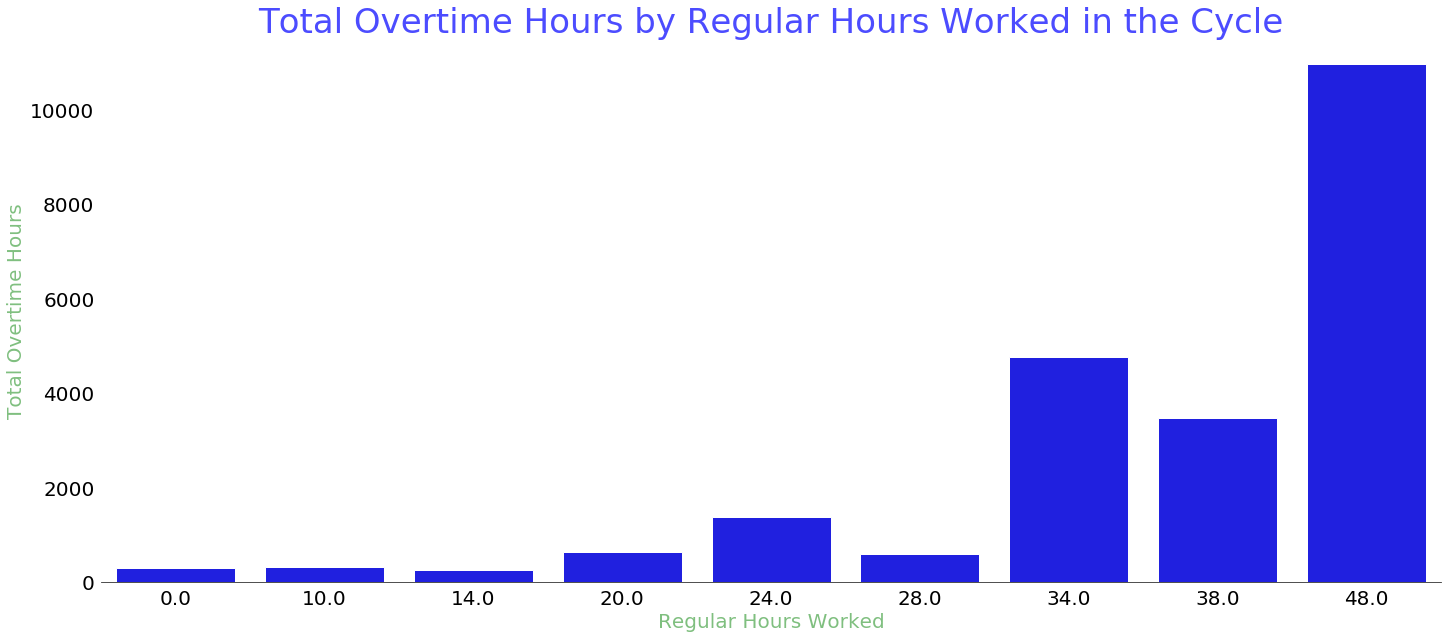

In [65]:
ot_hours = {}

hrs_0_1 = 0.0
hrs_tot   = 0.0
lt_full = 0
cycles = 0

for ffshift in cycle_totals.keys():
    st = cycle_totals[ffshift]
    for typ in st.keys():
        cycles += 1
        rh = st['scheduled']
        if (rh < 47.9): lt_full+=1
        if (rh not in ot_hours.keys()):
            ot_hours[rh] = 0.0
        if (('OT-' in typ) | (typ == 'OT')):
            if (typ != 'OT-EOD'):
                ot_hours[rh] += st[typ]    
                if (rh > 33.0): hrs_0_1 += st[typ]
                hrs_tot += st[typ]

x_labels = []
y_values = []

rh = 0.0
while (rh < 48.5):
    try:
        y_values.append(ot_hours[rh])
        x_labels.append(str(rh))
    except KeyError:
        ;
    rh += 1.0
    

print(x_labels)

print(y_values)

print(hrs_0_1)
print(hrs_tot)
print(lt_full)
print(cycles)

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
g = sns.barplot(x = x_labels, y = y_values, color = "#0000FF")
g.set_xlabel("Regular Hours Worked",size = 28,color="g",alpha=0.5)
g.set_ylabel("Total Overtime Hours",size = 28,color="g",alpha=0.5)
g.tick_params(labelsize=20,labelcolor="black")
g.axes.set_title('Total Overtime Hours by Regular Hours Worked in the Cycle',fontsize=34,color="b",alpha=0.7)
#savefig("../OT_hours_by_reg_hours.png")

#topbar = plt.Rectangle((0,0),1,1,fc="#00FF00", edgecolor = 'none')

#l = plt.legend([bottombar, topbar], ['OT Hours'], loc=2, ncol = 2, prop={'size':16})
#l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)

for item in ([g.xaxis.label, g.yaxis.label] +
             g.get_xticklabels() + g.get_yticklabels()):
    item.set_fontsize(20)

## Bar chart showing count of 8-day cycles by total overtime worked

In [66]:
tot_reg_hours  = []
tot_collateral = []
tot_ot_hours   = []

for key in cycle_totals.keys():
    reg_hrs = 0.0
    ot_hrs  = 0.0
    col_hrs = 0.0
    hrs = cycle_totals[key]
    try:
        reg_hrs += hrs['scheduled']
    except KeyError:
        ;
    tot_reg_hours.append(reg_hrs)
    for typ in hrs:
        if ((typ == 'OT') | ('OT-' in typ)):
            ot_hrs += cycle_totals[key][typ]
    tot_ot_hours.append(ot_hrs)

## Collect overtime hour totals in bins

In [67]:
ot_bins = []                                    #list of bin numbers, one for each cycle

cycles = 0                                      #count of 8-day cycles
tot_ot = 0.0                                    #total overtime hours

bin_size = 10.0                                 #bin size


for hrs in tot_ot_hours:                        #use the tot_ot_hours list
    cycles+=1                                   #each entry is a cycle for one FF
    tot_ot+= hrs                                #add in total OT hours
    otb = 1+int(hrs/bin_size)                   #get the bin number for this cycle and number of OT hours
    ot_bins.append(otb)                         #append to the list of bin numbers
    
print(tot_ot)                                   #print the total OT hours
print(cycles)                                   #print the cycle count
print(tot_ot/cycles)                            #average OT hours per cycle


22658.75
2259
10.030433820274459


2259
['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
[1202, 543, 315, 143, 36, 11, 9]


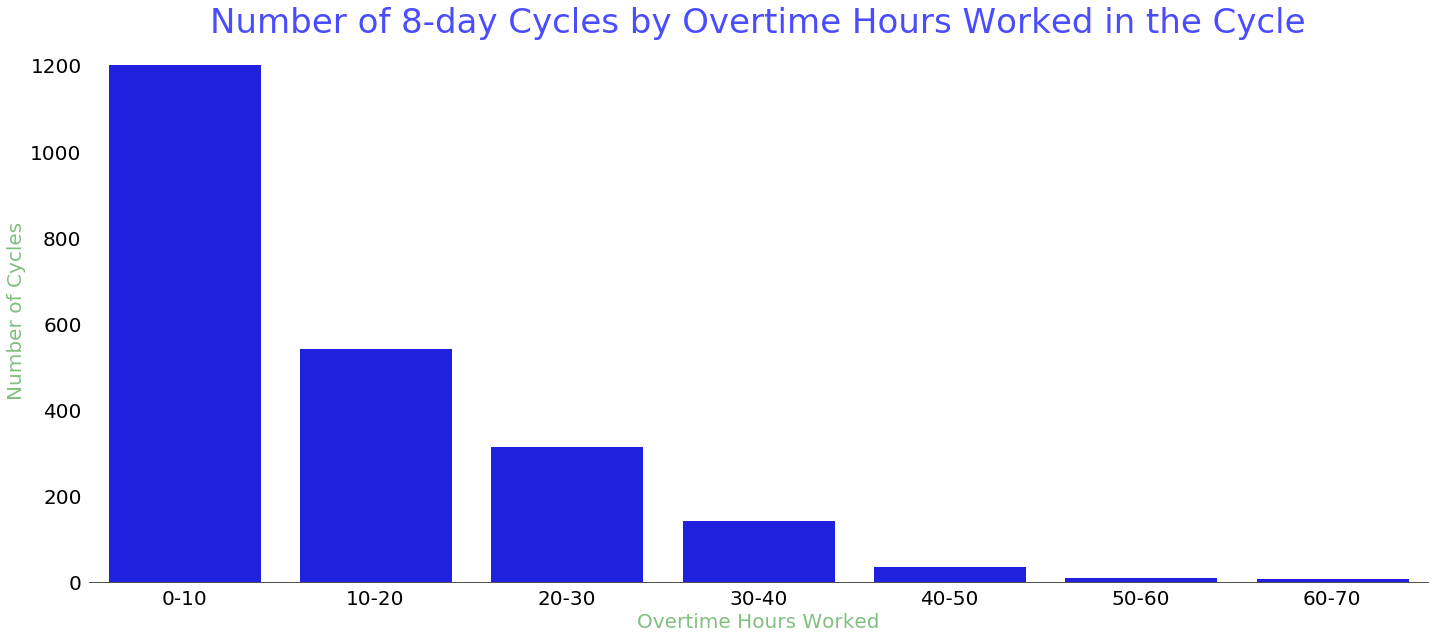

In [68]:
binct = {}                                      #dictionary of bin counts by bin number

for bno in ot_bins:                             #loop through the list of bin numbers for each cycle
    if (bno in binct):                          #if there is an entry for this bin number, increment the count
        binct[bno] += 1
    else:                                       #if not, initialize the count to 1
        binct[bno] = 1
                                                                       #set up x and y lists for seaborn
x_labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70']    #bin labels
y_values = []                                                          #y values
cycles = 0                                                             #initialize cycle count to zero

for k in binct.keys():                                                 #loop through bins
    y_values.append(binct[k])                                          #adding the cycle counts to the y list
    cycles+=binct[k]                                                   #count total cycles as a check
    
print(cycles)                                                          #print total cycles
    
print(x_labels)                                                        #print bin labels

print(y_values)                                                        #print cycle counts by bin number
                                                                       #seaborn barplot code
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
g = sns.barplot(x = x_labels, y = y_values, color = "#0000FF")
g.set_xlabel("Overtime Hours Worked",size = 28,color="g",alpha=0.5)
g.set_ylabel("Number of Cycles",size = 28,color="g",alpha=0.5)
g.tick_params(labelsize=20,labelcolor="black")
g.axes.set_title('Number of 8-day Cycles by Overtime Hours Worked in the Cycle',fontsize=34,color="b",alpha=0.7)
#g.savefig("../OT_hours_by_reg_hours.png")

#Optional code - Make plot look nicer
sns.despine(left=True)

#Set fonts to consistent 16pt size
for item in ([g.xaxis.label, g.yaxis.label] +
             g.get_xticklabels() + g.get_yticklabels()):
    item.set_fontsize(20)

## Seaborn stacked barchart for OT by reason in units of FTEs

### Get total hours for each overtime reason in units of FTEs

In [69]:
tot = {}
covered = {}

FTE_hours = 2142

print(cat)


for token in shifts.keys():
    for shift in shifts[token]['shifts']:
        if ((shift > start_date) & (shift < end_date)):
            try:
                typ = shifts[token]['shifts'][shift]['acct']['type']
                hours = shifts[token]['shifts'][shift]['acct']['hours']
                FTEs = hours/FTE_hours
                if (typ in cat['col']): fill_dict('col',typ,tot,covered,FTEs)
                elif (typ in cat['vac']): fill_dict('vac',typ,tot,covered,FTEs)
                elif (typ in cat['sick']): fill_dict('sick',typ,tot,covered,FTEs)
                elif (typ in cat['iod']): fill_dict('iod',typ,tot,covered,FTEs)
                elif (typ in cat['prs']): fill_dict('prs',typ,tot,covered,FTEs)
                elif (typ in cat['swap']): fill_dict('swap',typ,tot,covered,FTEs)
                elif (typ in cat['admin']): fill_dict('admin',typ,tot,covered,FTEs)
                elif (typ in cat['barg']): fill_dict('barg',typ,tot,covered,FTEs)
                elif (typ in cat['comp']): fill_dict('comp',typ,tot,covered,FTEs)
                elif (typ in cat['vncy']): fill_dict('vncy',typ,tot,covered,FTEs)
                elif (typ in cat['detail']): fill_dict('detail',typ,tot,covered,FTEs)
                elif (typ in cat['act']): fill_dict('act',typ,tot,covered,FTEs)
                elif (typ in cat['sch']): fill_dict('sch',typ,tot,covered,FTEs)
                elif (typ in cat['eod']): x=1
                elif (typ in cat['ot']): fill_dict('ot',typ,tot,covered,FTEs)
                else: 
                    print(typ)
                    print(token)
                    print(shift)
            except KeyError:
                ;
                
del tot['swap']
covered['col'] = 0.0
           
print("tot")
print(tot)
print("covered")
print(covered)

{'col': ['CS-APP', 'C-ND', 'CS-SO', 'C-DD', 'CS-TRN', 'C-FP', 'C-TRN', 'C-DIVE', 'CS-EMS', 'CS-SCBA', 'CS-FA', 'CS-BM', 'DP', 'DFP'], 'vac': ['VC', 'OT-VC'], 'sick': ['SL', 'OT-SL'], 'iod': ['IOD', 'OT-IOD'], 'prs': ['PRS', 'EMER', 'BER', 'OT-BERV', 'OT-PRS'], 'admin': ['ADMIN', 'OT-ADM', 'BARG', 'OT-BARG', 'SCH', 'OT-SCH'], 'act': ['ACT', 'ACTOT'], 'vncy': ['OT-VNCY'], 'eod': ['OT-EOD'], 'comp': ['CMP-E', 'CMP-U', 'OT-COMP'], 'ot': ['OT'], 'swap': ['SWAP', 'SWAPW']}
tot
{'vac': 3.7376283846871963, 'sick': 2.4159663865546146, 'prs': 0.6554621848739484, 'col': 4.363445378151247, 'iod': 4.701330532212871, 'admin': 0.43604108309990613}
covered
{'vac': 3.3916900093370574, 'prs': 0.546218487394957, 'sick': 2.0567226890756243, 'admin': 0.34617180205415476, 'iod': 2.9571661998132495, 'col': 0.0}


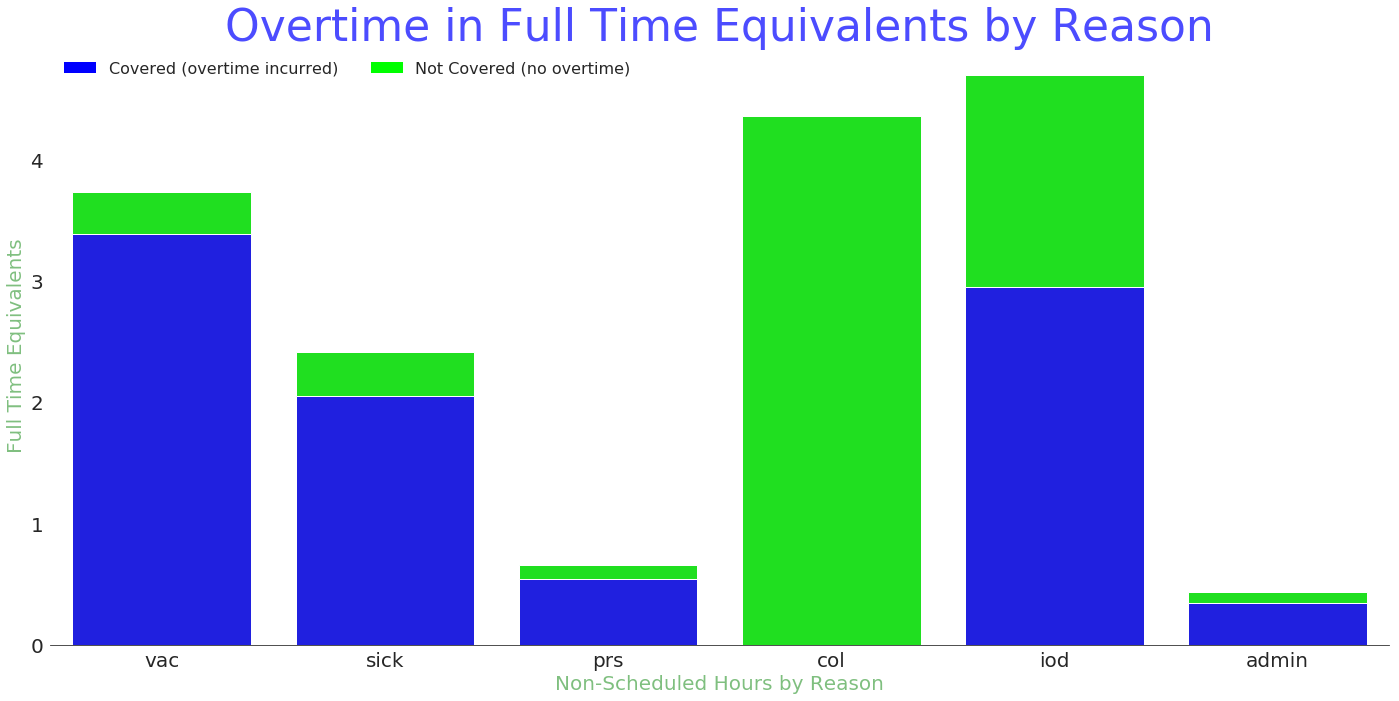

In [70]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

stacked_bar_data_groups = []
for key in tot.keys():
    stacked_bar_data_groups.append(key)

stacked_bar_data = []

for key in stacked_bar_data_groups:
    stacked_bar_data.append(covered[key])

stacked_bar_data_total = []

for key in stacked_bar_data_groups:
    stacked_bar_data_total.append(tot[key])

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 11)})

#Plot 1 - background - "total" (top) series
g = sns.barplot(x = stacked_bar_data_groups, y = stacked_bar_data_total, color = "#00FF00")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data_groups, y = stacked_bar_data, color = "#0000FF")

g.set_ylabel("Total Overtime Hours",size = 24,color="g",alpha=0.5)
g.set_xlabel("Reason",size = 28,color="g",alpha=0.5)
g.axes.set_title('Overtime in Full Time Equivalents by Reason',fontsize=44,color="b",alpha=0.7)


topbar = plt.Rectangle((0,0),1,1,fc="#00FF00", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000FF',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Covered (overtime incurred)', 'Not Covered (no overtime)'], loc=2, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Full Time Equivalents",size = 50,color="g",alpha=0.5)
bottom_plot.set_xlabel("Non-Scheduled Hours by Reason",size = 24,color="g",alpha=0.5)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)

## Stacked bar chart of OT hours by reason

ot_type
{'OT': 'OT', 'OT-SL': 'OT-SL', 'OT-PRS': 'OT-PRS', 'OT-BERV': 'OT-BERV', 'OT-VC': 'OT-VC', 'OT-ADM': 'OT-ADM', 'OT-IOD': 'OT-IOD', 'OT-VNCY': 'OT-VNCY', 'OT-COMP': 'OT-COMP', 'OT-BARG': 'OT-BARG', 'OT-SCH': 'OT-SCH', 'OT-EMERG': 'OT-EMERG'}
ot_hours
{'OT': 1143.0, 'OT-SL': 4405.5, 'OT-PRS': 886.0, 'OT-BERV': 232.0, 'OT-VC': 7229.0, 'OT-ADM': 637.5, 'OT-IOD': 6406.25, 'OT-VNCY': 745.0, 'OT-COMP': 686.0, 'OT-BARG': 98.0, 'OT-SCH': 16.0, 'OT-EMERG': 11.0}
ot_reduced
{'OT': 620.0, 'OT-SL': 2151.5, 'OT-PRS': 340.0, 'OT-BERV': 124.0, 'OT-VC': 3382.0, 'OT-ADM': 275.0, 'OT-IOD': 3077.5, 'OT-VNCY': 405.0, 'OT-COMP': 416.0, 'OT-BARG': 65.0, 'OT-SCH': 16.0, 'OT-EMERG': 0.0}


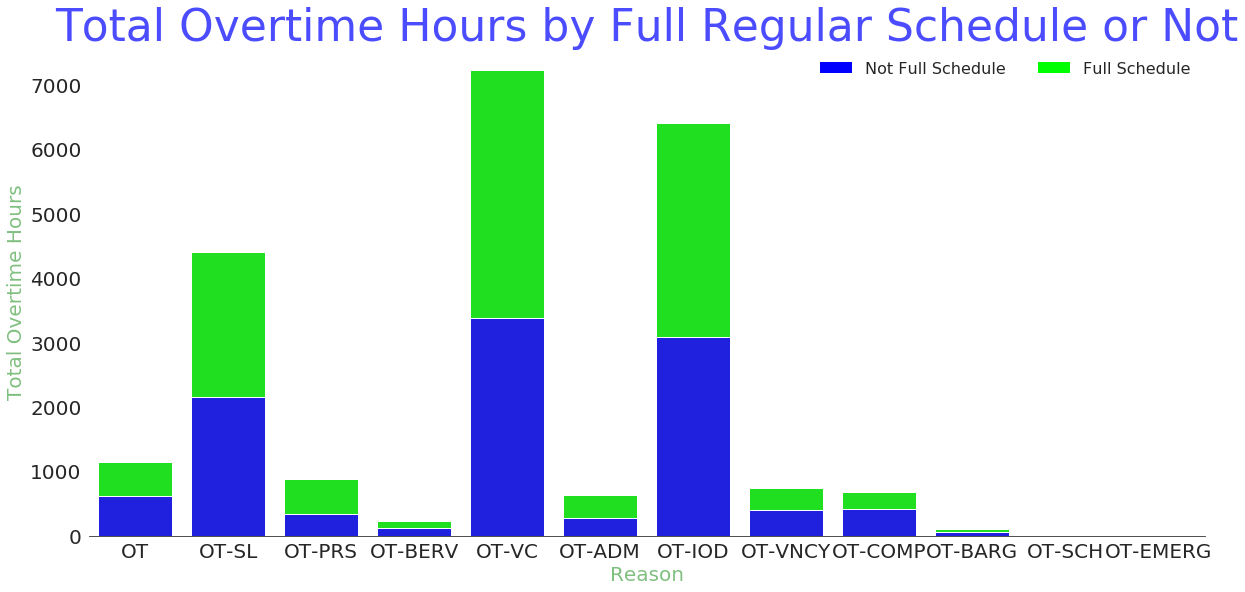

In [71]:
ot_type = {}
ot_hours = {}
ot_reduced = {}

for ffshift in cycle_totals.keys():
    st = cycle_totals[ffshift]
    for typ in st.keys():
        if (('OT-' in typ) | (typ == 'OT')):
            if (typ != 'OT-EOD'):
                if (typ not in ot_type.keys()): 
                    ot_type[typ] = typ
                    ot_hours[typ] = 0.0
                    ot_reduced[typ] = 0.0
                else:
                    hrs = cycle_totals[ffshift][typ]
                    ot_hours[typ] += hrs
                    try:
                        if (st['scheduled'] >= 48.0): ot_reduced[typ] += hrs
                    except KeyError:
                        ;
print('ot_type')        
print(ot_type)
print('ot_hours')
print(ot_hours)
print('ot_reduced')
print(ot_reduced)

xlab = []
ybot = []
ytop = []

for typ in ot_type.keys():
    xlab.append(typ)
    ybot.append(ot_reduced[typ])
    ytop.append(ot_hours[typ])

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 9)})

#Plot 1 - background - "total" (top) series
g = sns.barplot(x = xlab, y = ytop, color = "#00FF00")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = xlab, y = ybot, color = "#0000FF")


topbar = plt.Rectangle((0,0),1,1,fc="#00FF00", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000FF',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Not Full Schedule', 'Full Schedule'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
g.set_ylabel("Total Overtime Hours",size = 24,color="g",alpha=0.5)
g.set_xlabel("Reason",size = 28,color="g",alpha=0.5)
g.axes.set_title('Total Overtime Hours by Full Regular Schedule or Not',fontsize=44,color="b",alpha=0.7)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(20)